## Summary Statistics 
#### Table 1-3, Figure 2, Appendix A,F

In [1]:
dir_path = '/Users/jeremyzyang/Library/CloudStorage/GoogleDrive-jeremy.z.yang@gmail.com/My Drive/tiktok_revision'
setwd(dir_path)

In [2]:
load('tiktok.RData')
options(warn = -1)

In [3]:
suppressWarnings(suppressMessages(library(data.table)))
suppressWarnings(suppressMessages(library(tidyverse)))
suppressWarnings(suppressMessages(library(lfe)))
suppressWarnings(suppressMessages(library(patchwork)))
suppressWarnings(suppressMessages(library(zoo)))
suppressWarnings(suppressMessages(library(doParallel)))
suppressWarnings(suppressMessages(library(staggered)))
suppressWarnings(suppressMessages(library(fixest)))
suppressWarnings(suppressMessages(library(faux)))
suppressWarnings(suppressMessages(library(stargazer)))
suppressWarnings(suppressMessages(library(xgboost)))
suppressWarnings(suppressMessages(library(caret)))

In [4]:
sessionInfo()

R version 4.2.1 (2022-06-23)
Platform: x86_64-apple-darwin17.0 (64-bit)
Running under: macOS Big Sur ... 10.16

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/4.2/Resources/lib/libRblas.0.dylib
LAPACK: /Library/Frameworks/R.framework/Versions/4.2/Resources/lib/libRlapack.dylib

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

attached base packages:
[1] parallel  stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] caret_6.0-93      lattice_0.20-45   xgboost_1.6.0.1   stargazer_5.2.3  
 [5] faux_1.1.0        fixest_0.10.4     staggered_1.1     doParallel_1.0.17
 [9] iterators_1.0.14  foreach_1.5.2     zoo_1.8-11        patchwork_1.1.2  
[13] lfe_2.8-8         Matrix_1.5-1      forcats_0.5.2     stringr_1.4.1    
[17] dplyr_1.0.10      purrr_0.3.4       readr_2.1.3       tidyr_1.2.1      
[21] tibble_3.1.8      ggplot2_3.3.6     tidyverse_1.3.2   data.table_1.14.2

loaded via a names

In [5]:
ls()

[1] "activity"           "dir_path"           "e_space"           
 [4] "e_time"             "emotion"            "loss"              
 [7] "model_construction" "model_evaluation"   "object"            
[10] "own"                "p_space"            "p_time"            
[13] "pe_space"           "pe_time"            "search"

In [6]:
training = model_construction
df = model_evaluation

#### Table 1

In [7]:
df %>% 
distinct(taobao_id, .keep_all = T) %>% 
ungroup %>% 
select(like, comment, share) %>% 
as.data.frame %>% 
stargazer(type = 'text', digits = 0, median = T)


Statistic   N    Mean  St. Dev. Min Median    Max   
----------------------------------------------------
like      2,685 38,515 111,116   0  3,654  1,831,709
comment   2,685  542    2,052    0    84    71,068  
share     2,685  936    5,007    0    80    166,821 
----------------------------------------------------


In [8]:
stargazer(training %>% 
          select(like, comment, share) %>%
          as.data.frame, 
          summary.stat = c("n", "mean", "sd", "min", "median", "max"),
          digits = 0,
          type = "text")


Statistic   N     Mean  St. Dev. Min Median    Max   
-----------------------------------------------------
like      16,951 34,339 112,302   0  3,021  2,553,627
comment   16,951  531    2,124    0    69    71,068  
share     16,951 1,184   6,690    0    91    195,563 
-----------------------------------------------------


#### Table 2

In [9]:
df %>% 
group_by(taobao_id) %>% 
mutate(avg_sales = mean(rev)*1000,
       price = first(price),
       discount = first(discount)) %>% 
distinct(taobao_id, .keep_all = T) %>% 
ungroup %>%
select(avg_sales, price, discount) %>% 
as.data.frame %>% 
stargazer(type = 'text', digits = 0, median = T)


Statistic   N    Mean   St. Dev.  Min Median     Max    
--------------------------------------------------------
avg_sales 2,685 246,680 5,288,389  0  9,446  272,107,695
price     2,685  1,081   39,220    0    68    2,019,515 
discount  2,685   100      506     0    20     13,901   
--------------------------------------------------------


In [10]:
df %>% 
ungroup %>% 
distinct(influencer_id, .keep_all = T) %>% 
select(gender) %>% 
as.data.frame %>%
stargazer(type = 'text', digits = 2, median = T)

df %>% 
ungroup %>% 
distinct(influencer_id, .keep_all = T) %>% 
select(fans, avg_play, influencer_price, expected_cpm, order_cnt) %>% 
as.data.frame %>%
stargazer(type = 'text', digits = 0, median = T)


Statistic   N   Mean St. Dev. Min Median Max
--------------------------------------------
gender    1,404 0.58   0.49    0    1     1 
--------------------------------------------

Statistic          N     Mean    St. Dev.  Min Median     Max    
-----------------------------------------------------------------
fans             1,404 1,617,806 3,048,990  0  723,679 43,012,100
avg_play         1,404  635,432  3,255,567  0  74,908  97,890,191
influencer_price 1,404  19,530    53,808    0   6,000  1,000,000 
expected_cpm     1,404   1,027    21,315    0    121    785,714  
order_cnt        1,404    13        27      0     2       265    
-----------------------------------------------------------------


#### Table 3

In [11]:
df %>% 
ungroup %>% 
distinct(taobao_id, .keep_all = T) %>% 
select(e_score, p_score, pe_score) %>% 
as.data.frame %>% 
stargazer(type = 'text', digits = 2, median = T)


Statistic   N   Mean St. Dev. Min  Median Max 
----------------------------------------------
e_score   2,685 0.48   0.15   0.00  0.49  1.00
p_score   2,685 0.18   0.14   0.00  0.15  1.00
pe_score  2,685 0.21   0.14   0.00  0.19  1.00
----------------------------------------------


#### Figure 2

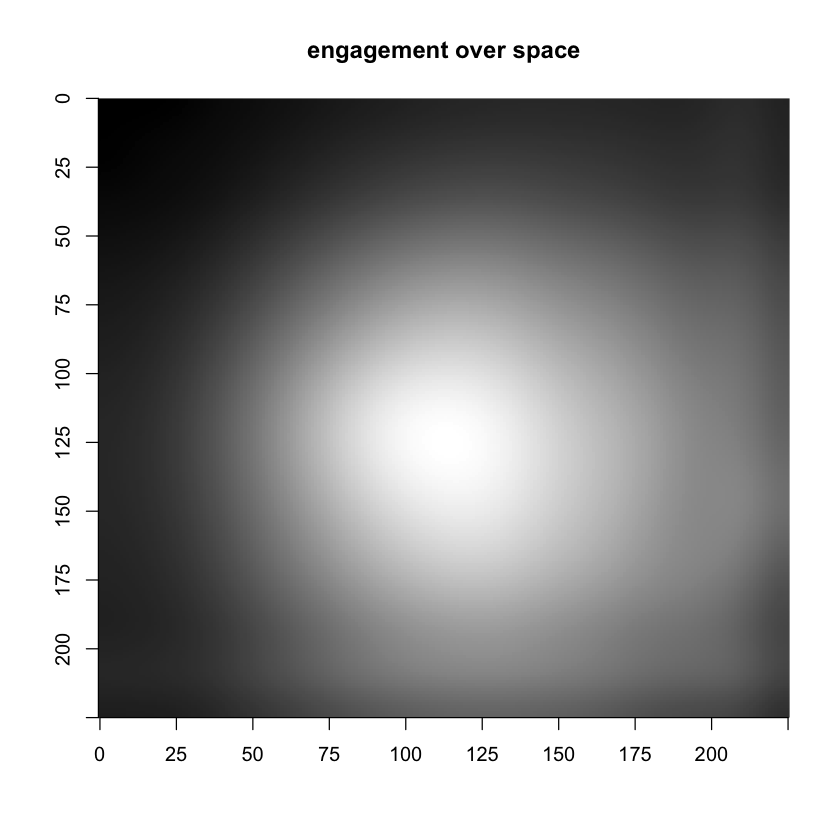

In [12]:
image(e_space,
     col=grey(seq(0, 1, length = 256)),
          ylim=c(1,0), axes = F)
title(main = "engagement over space")
axis(1, at = seq(0, 1, length.out = 10), labels = c(seq(0, 223, by = 25), ''))
axis(2, at = seq(0, 1, length.out = 10), labels = c(seq(0, 223, by = 25), ''))

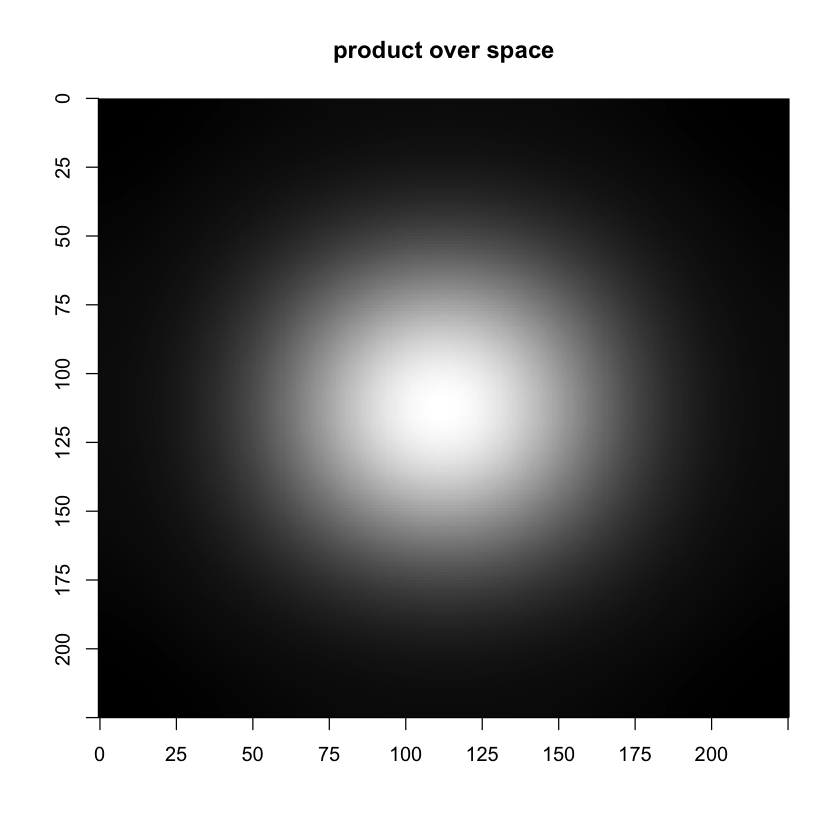

In [13]:
image(p_space,
     col=grey(seq(0, 1, length = 256)),
          ylim=c(1,0), axes = F)
title(main = "product over space")
axis(1, at = seq(0, 1, length.out = 10), labels = c(seq(0, 223, by = 25), ''))
axis(2, at = seq(0, 1, length.out = 10), labels = c(seq(0, 223, by = 25), ''))

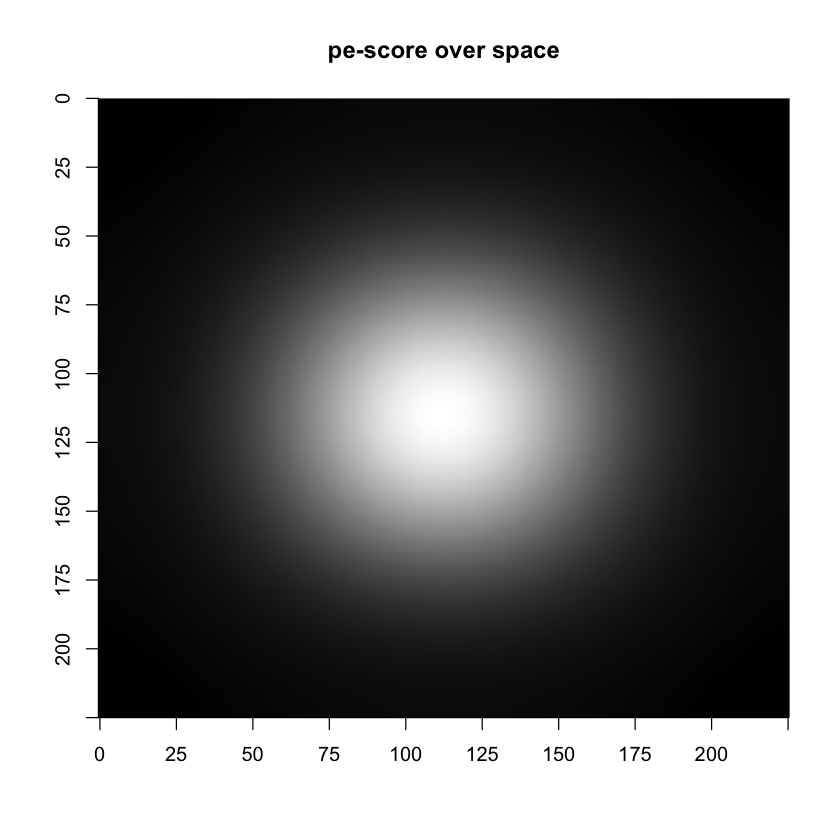

In [14]:
image(pe_space,
     col=grey(seq(0, 1, length = 256)),
          ylim=c(1,0), axes = F)
title(main = "pe-score over space")
axis(1, at = seq(0, 1, length.out = 10), labels = c(seq(0, 223, by = 25), ''))
axis(2, at = seq(0, 1, length.out = 10), labels = c(seq(0, 223, by = 25), ''))

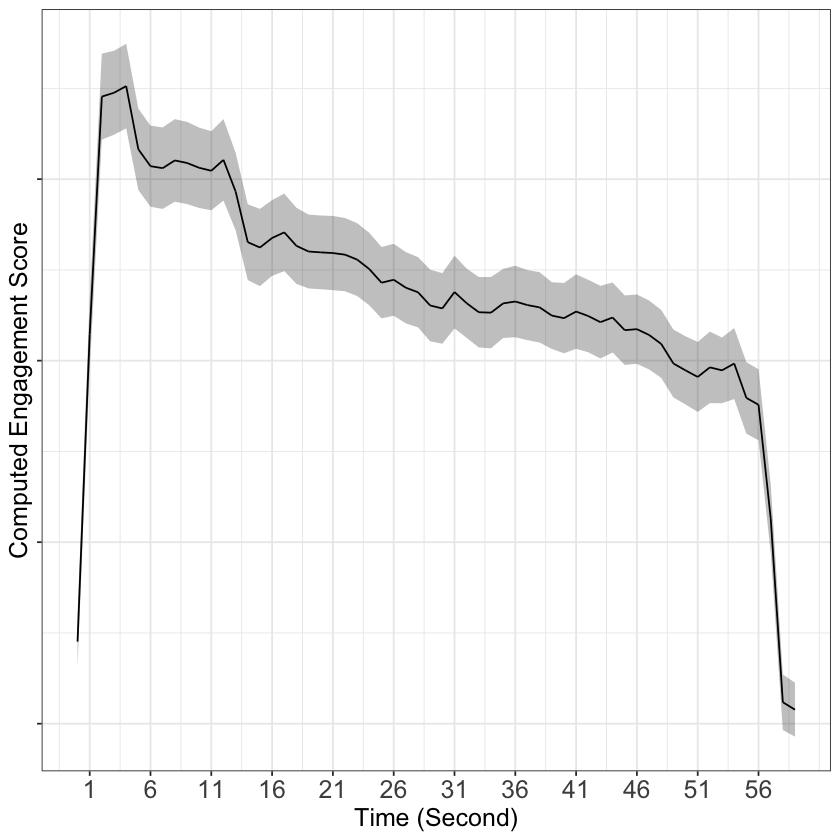

In [15]:
ggplot(aes(time, value), 
       data = e_time %>% 
       group_by(time) %>% 
       mutate(mean_value = mean(value, na.rm = T),
              sd_value = sd(value, na.rm = T))) + 
geom_ribbon(aes(ymin = mean_value - 0.1*sd_value,
               ymax = mean_value + 0.1*sd_value), alpha=0.3) +
geom_line(aes(time, mean_value)) +
theme_bw() +
scale_x_continuous(breaks=seq(1,60,5)) +
xlab('Time (Second)') +
ylab('Computed Engagement Score') +
theme(axis.text=element_text(size=15),
        axis.title=element_text(size=15)) +
theme(axis.text.y = element_blank()) 

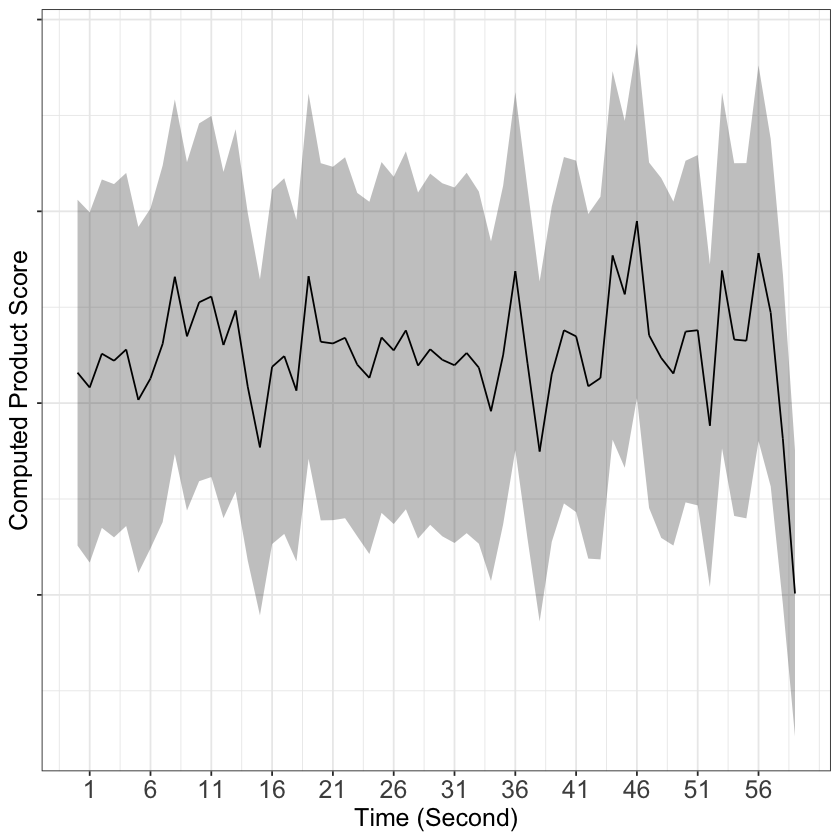

In [16]:
ggplot(aes(time, value), 
       data = p_time %>% 
       group_by(time) %>% 
       mutate(mean_value = mean(value, na.rm = T),
              sd_value = sd(value, na.rm = T))) + 
geom_ribbon(aes(ymin = mean_value - 0.1*sd_value,
               ymax = mean_value + 0.1*sd_value), alpha=0.3) +
geom_line(aes(time, mean_value)) +
theme_bw() +
scale_x_continuous(breaks=seq(1,60,5)) +
xlab('Time (Second)') +
ylab('Computed Product Score') +
theme(axis.text=element_text(size=15),
        axis.title=element_text(size=15)) +
theme(axis.text.y = element_blank())

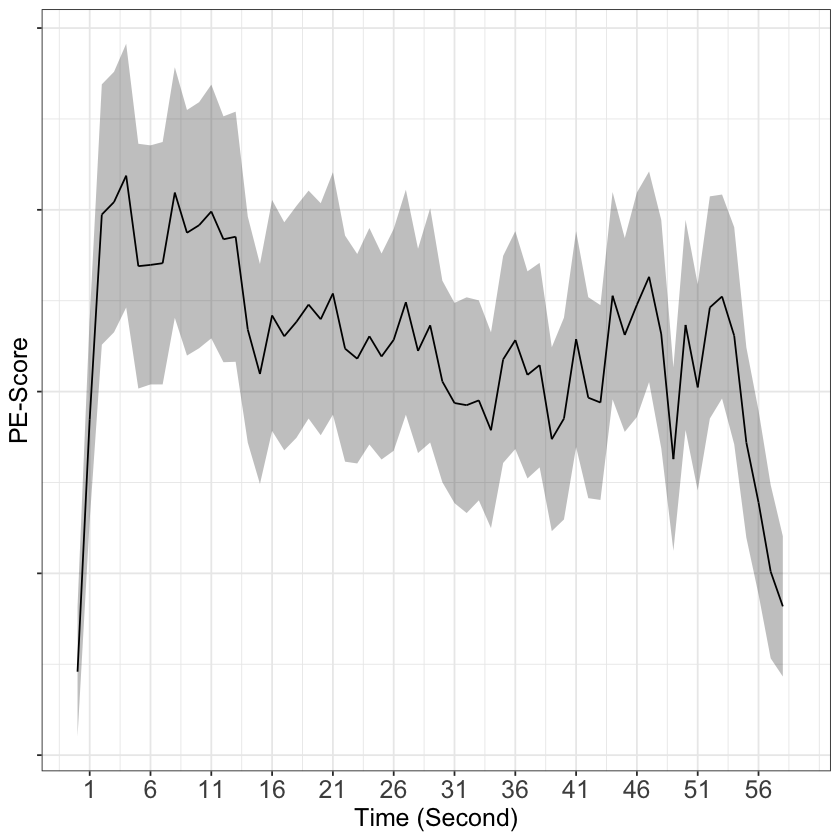

In [17]:
ggplot(aes(time, value), 
       data = pe_time %>% 
       group_by(time) %>% 
       mutate(mean_value = mean(value, na.rm = T),
              sd_value = sd(value, na.rm = T))) + 
geom_ribbon(aes(ymin = mean_value - 0.1*sd_value,
               ymax = mean_value + 0.1*sd_value), alpha=0.3) +
geom_line(aes(time, mean_value)) +
theme_bw() +
scale_x_continuous(breaks=seq(1,60,5)) +
xlab('Time (Second)') +
ylab('PE-Score') +
theme(axis.text=element_text(size=15),
        axis.title=element_text(size=15)) +
theme(axis.text.y = element_blank())

save.image('tiktok.RData')

#### Appendix A: Figure A.4

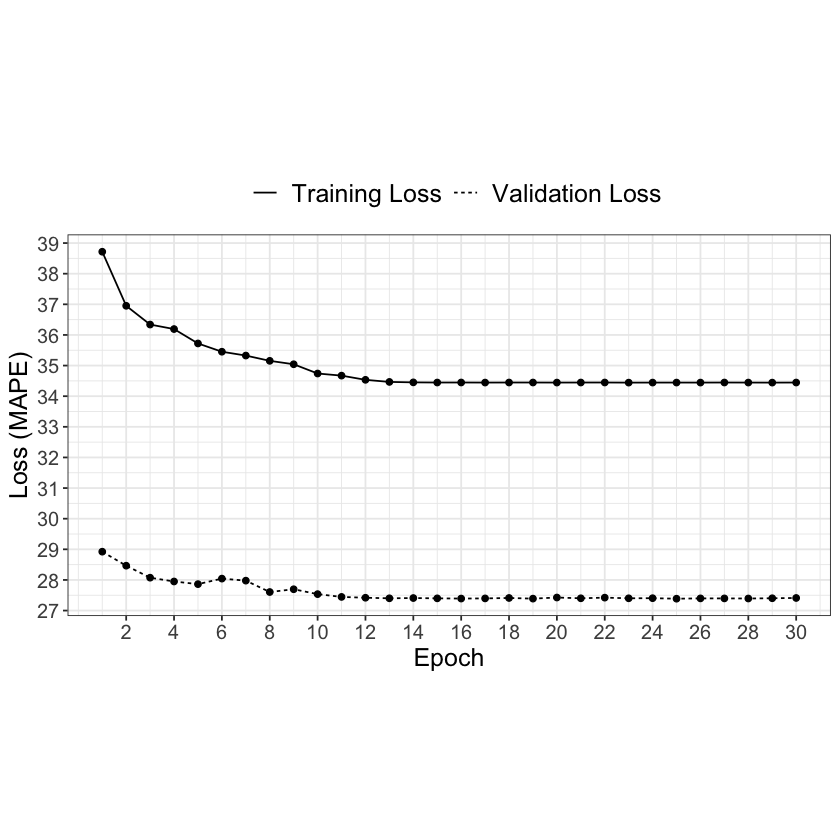

In [18]:
pivot_longer(loss, c('Training Loss', 'Validation Loss')) %>% 
ggplot(aes(epoch, value, linetype = name)) + 
   geom_point() +
   geom_line() +
scale_y_continuous(breaks = seq(0,40,1)) +
scale_x_continuous(breaks = seq(2,30,2)) + 
xlab('Epoch') +
ylab('Loss (MAPE)') +
theme_bw() +
theme(legend.position="top",
        legend.title=element_blank()) +
theme(text = element_text(size=15)) +
theme(legend.text = element_text(size=15)) +
theme(aspect.ratio=2/4)

#### Appendix F: Figure F.1

In [19]:
df_ss = df %>% 
group_by(video_id) %>% 
mutate(rev_avg = mean(rev)) %>% 
distinct(video_id, .keep_all = T)

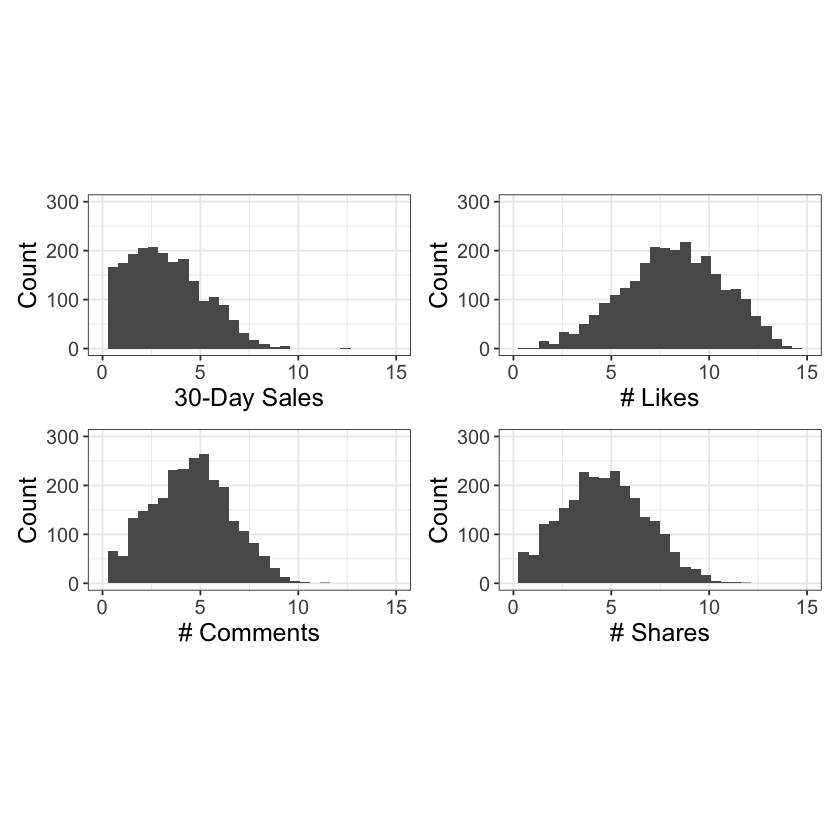

In [20]:
ggplot(aes(log(rev_avg)), data = df_ss) + geom_histogram(bins = 30) + theme_bw() +
theme(text = element_text(size=15)) + xlim(c(0,15)) + xlab('30-Day Sales') + ylab('Count') + ylim(c(0,300)) + theme(aspect.ratio=2/4) +

ggplot(aes(log(like)), data = df_ss) + geom_histogram(bins = 30) + theme_bw() +
theme(text = element_text(size=15)) + xlim(c(0,15))+ xlab('# Likes') + ylab('Count') + ylim(c(0,300)) + theme(aspect.ratio=2/4) +

ggplot(aes(log(comment)), data = df_ss) + geom_histogram(bins = 30) + theme_bw() +
theme(text = element_text(size=15)) + xlim(c(0,15)) + xlab('# Comments') + ylab('Count') + ylim(c(0,300)) + theme(aspect.ratio=2/4) +

ggplot(aes(log(share)), data = df_ss) + geom_histogram(bins = 30) + theme_bw() +
theme(text = element_text(size=15)) + xlim(c(0,15)) + xlab('# Shares') + ylab('Count') + ylim(c(0,300)) + theme(aspect.ratio=2/4) +

plot_layout(ncol = 2)

#### Appendix F: Figure F.2

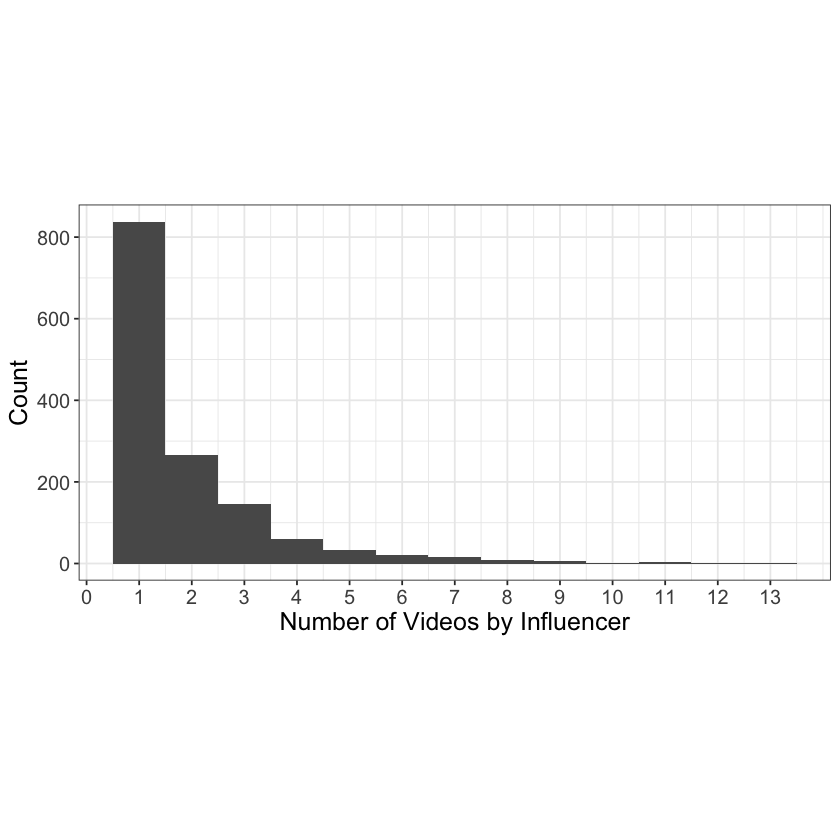

In [21]:
ggplot(aes(n_video), 
                            data = df_ss %>% 
                    group_by(influencer_id) %>% 
                    summarize(n_video = n())) + 
geom_histogram(binwidth = 1) + 
theme_bw() +
theme(text = element_text(size=15)) + 
scale_x_continuous(breaks = seq(0, 13, by = 1)) + 
ylab('Count') +
xlab('Number of Videos by Influencer') +
theme(aspect.ratio=2/4)

#### Appendix F: Figure F.3

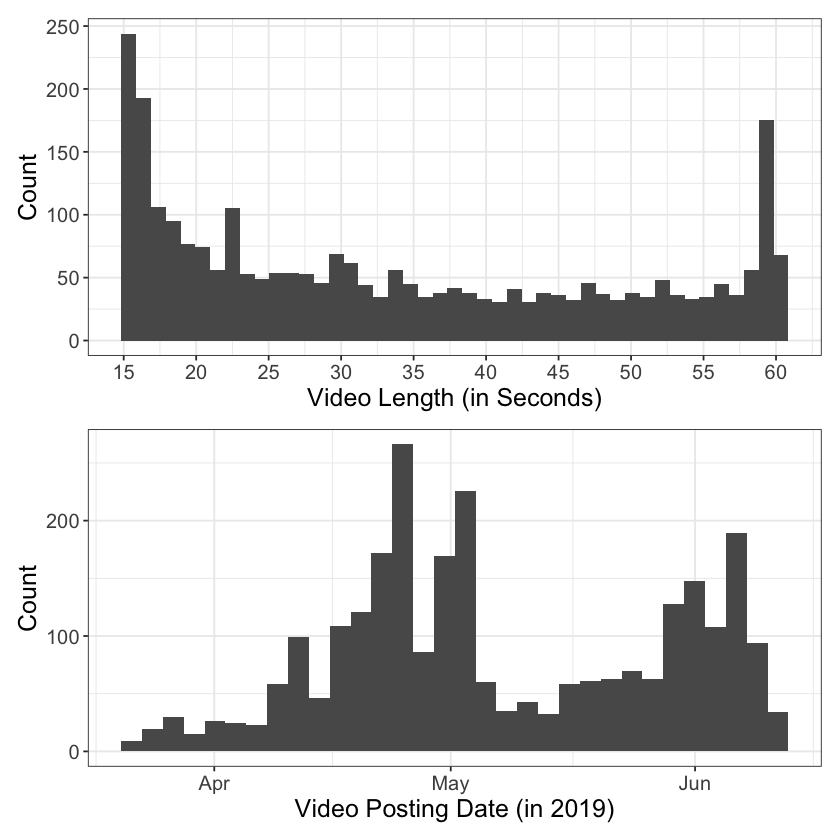

In [22]:
ggplot(aes(len), data = df_ss) + 
geom_histogram(bins = 45) + 
theme_bw() +
theme(text = element_text(size=15)) +
scale_x_continuous(breaks = seq(15, 60, by = 5)) + xlab('Video Length (in Seconds)') + ylab('Count') + 

ggplot(aes(video_posted_time), data = df_ss) + 
geom_histogram(bins = 228/7) + theme_bw() +
theme(text = element_text(size=15)) + xlab('Video Posting Date (in 2019)') + ylab('Count') +
scale_x_date(date_breaks = "1 month", date_labels = "%b") +

plot_layout(ncol = 1)

#### Appendix F: Figure F.4

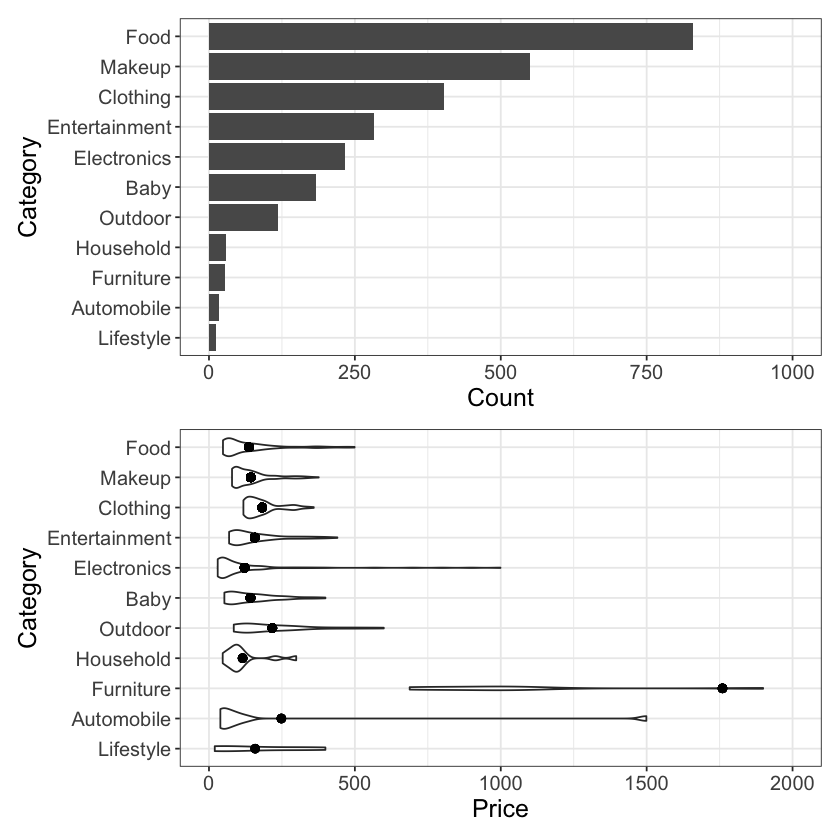

In [23]:
ggplot(aes(fct_rev(fct_infreq(category))), data = df_ss) +  geom_bar() + theme_bw() + 
theme(text = element_text(size=15)) + ylim(c(0,1000)) + xlab('Category') + ylab('Count') + coord_flip() +

ggplot(df_ss%>% 
group_by(category) %>%
filter(price <= quantile(price,0.95) & price >= quantile(price,0.5)) %>%
mutate(price_avg = mean(price), n = n()), 
               aes(x= reorder(category, n), 
                               y=price))  + geom_violin() + 
coord_flip() + 
theme_bw() + 
geom_point(aes(category, price_avg), size = 2) +
theme(text = element_text(size=15)) +
scale_y_continuous(limits = c(0,2000), 
                    breaks = seq(0, 2000, 500)) + xlab('Category') + ylab('Price') +

plot_layout(ncol = 1)

#### Appendix F: Figure F.5

In [24]:
# create separate data frames for treated and control products

df = df %>% group_by(taobao_id) %>% 
  mutate(treated_mean = mean(treated))

df %>% distinct(taobao_id, .keep_all = T) %>%
  filter(treated_mean != 1) %>%
  pull(treated_mean) %>% table %>% sum

df_treat = filter(df, treated_mean != 1)
df_control = filter(df, treated_mean == 1)

treat_id = unique(df_treat$taobao_id)

[1] 259

In [25]:
s = df_treat %>% # compute average revenue before and after the treatment 
  ungroup() %>%
  group_by(taobao_id, treated) %>% 
  mutate(
    avg_rev = mean(rev)
  ) %>%
  distinct(taobao_id, treated, .keep_all = T) %>%
  arrange(taobao_id) %>% 
  ungroup() %>%
  group_by(taobao_id) %>%
  mutate(count = n()) %>%
  filter(count == 2) %>%
  ungroup()


	Pearson's product-moment correlation

data:  s$like and s$rev_diff
t = -0.12059, df = 257, p-value = 0.9041
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.1292924  0.1144714
sample estimates:
         cor 
-0.007522289 



	Pearson's product-moment correlation

data:  s$comment and s$rev_diff
t = -0.32743, df = 257, p-value = 0.7436
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.1419556  0.1017216
sample estimates:
        cor 
-0.02042023 



	Pearson's product-moment correlation

data:  s$share and s$rev_diff
t = -0.11913, df = 257, p-value = 0.9053
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.1292024  0.1145617
sample estimates:
         cor 
-0.007430714 


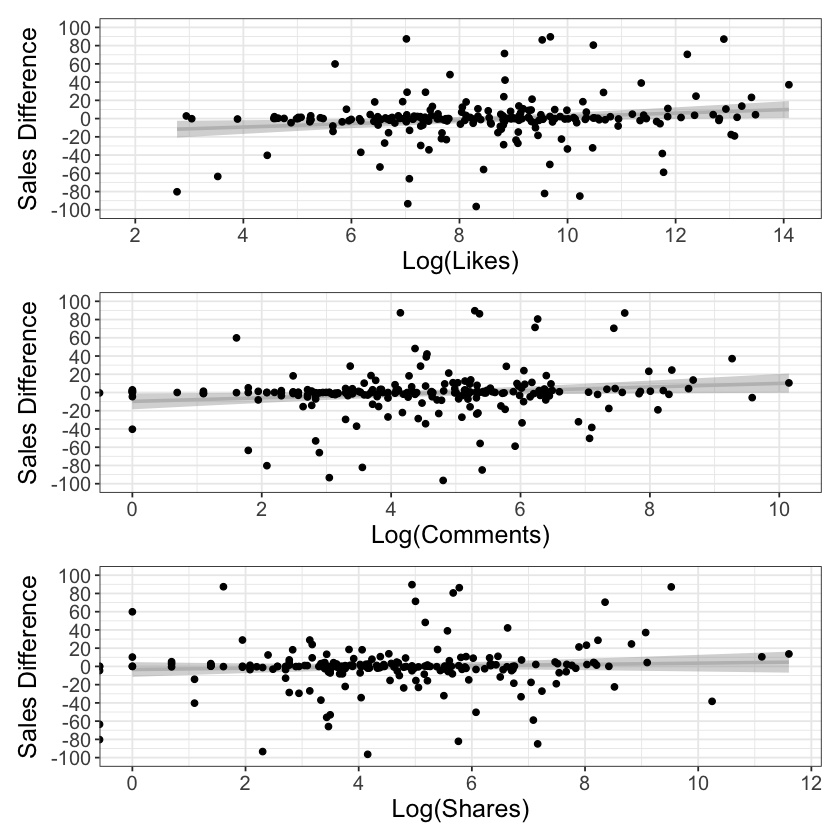

In [26]:
s = df_treat %>% # compute average revenue before and after the treatment 
  ungroup() %>%
  group_by(taobao_id, treated) %>% 
  mutate(
    avg_rev = mean(rev)
  ) %>%
  distinct(taobao_id, treated, .keep_all = T) %>%
  arrange(taobao_id) %>% 
  ungroup() %>%
  group_by(taobao_id) %>%
  mutate(count = n()) %>%
  ungroup()

s = dcast(s, taobao_id ~ treated, value.var = c("avg_rev")) # reshape the data frame so the average revenue before and after the treatment becomes two separate columns

s = left_join(s, df_treat %>% 
                distinct(taobao_id, .keep_all = T) %>%
                select(taobao_id, like, comment, share, pe_score), by ='taobao_id') 

s$rev_diff = s[,3] - s[,2] # compute the difference in average revenue before and after the treatment 

g_like = ggplot(s,
           aes(log(like), rev_diff)) +
  geom_smooth(method = 'lm', color = 'grey', formula = y ~ x) +
  geom_point() +
  xlab('Log(Likes)') + 
  ylab('Sales Difference') + 
  theme_bw() +
  theme(text = element_text(size=15)) +
  scale_y_continuous(
      limits = c(-100,100),
          breaks=seq(-100, 100, 20)
  ) +
  scale_x_continuous(
    breaks=seq(0, 15, 2)
  ) 

cor.test(s$like, s$rev_diff)

g_comment = ggplot(s,
           aes(log(comment), rev_diff)) +
  geom_smooth(method = 'lm', color = 'grey', formula = y ~ x) +
  geom_point() +
  xlab('Log(Comments)') + 
  ylab('Sales Difference') + 
theme_bw() +
  theme(text = element_text(size=15)) +
  scale_y_continuous(
      limits = c(-100,100),
          breaks=seq(-100, 100, 20)
  ) +
  scale_x_continuous(
    breaks=seq(0, 10, 2)
  ) 

cor.test(s$comment, s$rev_diff)

g_share = ggplot(s,
           aes(log(share), rev_diff)) +
  geom_smooth(method = 'lm', color = 'grey', formula = y ~ x) +
  geom_point() +
  xlab('Log(Shares)') + 
  ylab('Sales Difference') + 
  theme_bw() +
  theme(text = element_text(size=15)) +
  scale_y_continuous(
            limits = c(-100,100),
          breaks=seq(-100, 100, 20)
  ) +
  scale_x_continuous(
    breaks=seq(0, 12, 2)
  ) 

cor.test(s$share, s$rev_diff)

g_like/g_comment/g_share